# Titanic Classification

Given certain predictors, we need to determine if a given person survived the sinking of the Titanic or not.

In [1]:
import pandas as pd
import numpy as np

# import the dataset, print some information about its columns
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df['training'] = 1
test_df['training'] = 0

df = pd.concat([train_df, test_df], ignore_index=True)

is_train = df['training'] == 1

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  training     1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 133.1+ KB


C:\Users\paraZite\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\paraZite\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


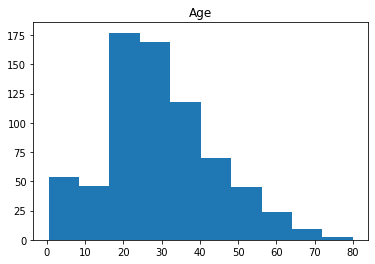

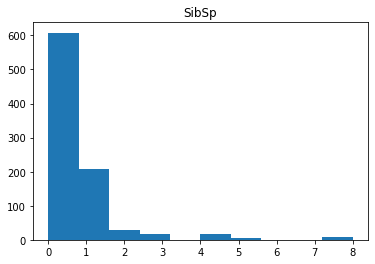

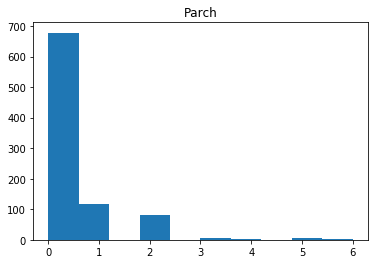

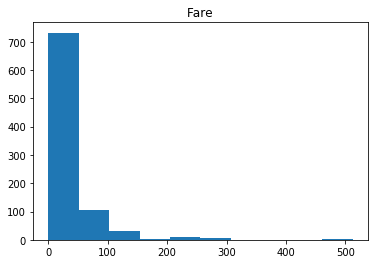

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

df_num = train_df[['Age', 'SibSp', 'Parch', 'Fare']]
df_cat = train_df[['Sex', 'Embarked', 'Survived', 'Pclass', 'Ticket', 'Cabin']]

for num in df_num.columns:
    plt.hist(df_num[num])
    plt.title(num)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


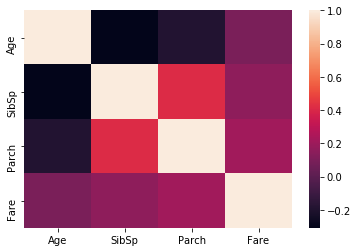

In [3]:
print(df_num.corr())

sns.heatmap(df_num.corr())

In [4]:
pd.pivot_table(train_df, index='Survived', values=['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


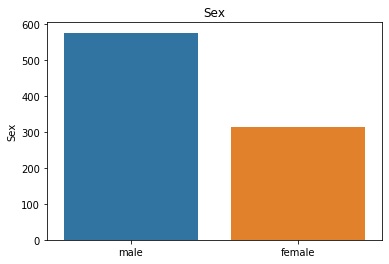

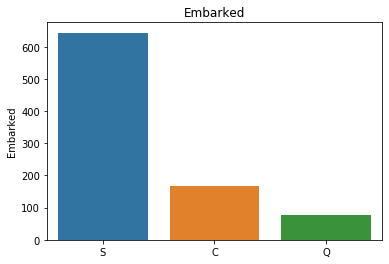

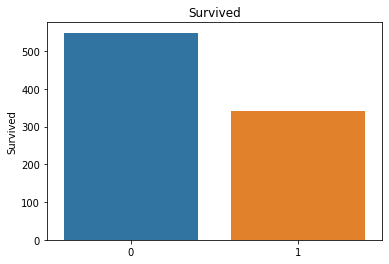

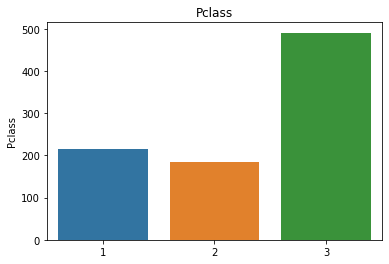

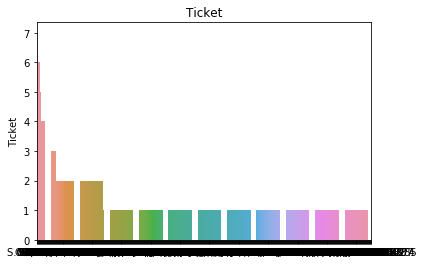

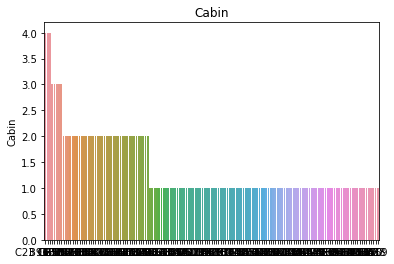

In [5]:
for column in df_cat:
    sns.barplot(x=df_cat[column].value_counts().index, y=df_cat[column].value_counts())
    plt.title(column)
    plt.show()

In [6]:
pd.pivot_table(data=train_df, index='Survived', columns='Sex', values='Ticket', aggfunc='count')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [7]:
pd.pivot_table(data=train_df, index='Survived', columns='Embarked', values='Ticket', aggfunc='count')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [8]:
pd.pivot_table(data=train_df, index='Survived', columns='Pclass', values='Ticket', aggfunc='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


From the pivot tables above, we can see the following:
1. men were more likely to die than women
2. people who embarked in Southampton were more likely to die, while those who embarked in Cherbourg were least likely to die
3. people with a 1st ticket class were least likely to die, while those with 3rd class tickets were most likely to die

In [9]:
df['Cabin Multiple'] = df['Cabin'].apply(lambda x : 0 if pd.isna(x) else len(x.split(' ')))
df['Cabin Multiple'].value_counts()

0    1014
1     254
2      26
3      10
4       5
Name: Cabin Multiple, dtype: int64

In [10]:
pd.pivot_table(data=df[is_train], index='Survived', columns='Cabin Multiple', values='Ticket', aggfunc='count')

Cabin Multiple,0,1,2,3,4
Survived,,,,,
0.0,481.0,58.0,7.0,3.0,NaN
1.0,206.0,122.0,9.0,3.0,2.0


We can see that people with just one cabin were most likely to survive, while the ones with no cabins were least likely to survive.

In [11]:
df['Cabin Type'] = df['Cabin'].apply(lambda x: str(x)[0])
df['Cabin Type'].value_counts()

n    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin Type, dtype: int64

In [12]:
pd.pivot_table(data=df[is_train], index='Survived', columns='Cabin Type', values='Ticket', aggfunc='count')

Cabin Type,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0.0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1.0,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [13]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Age'].isna().value_counts()

False    1309
Name: Age, dtype: int64

In [14]:
df = df.dropna(subset=['Embarked'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     1307 non-null   int64  
 1   Survived        889 non-null    float64
 2   Pclass          1307 non-null   int64  
 3   Name            1307 non-null   object 
 4   Sex             1307 non-null   object 
 5   Age             1307 non-null   float64
 6   SibSp           1307 non-null   int64  
 7   Parch           1307 non-null   int64  
 8   Ticket          1307 non-null   object 
 9   Fare            1306 non-null   float64
 10  Cabin           293 non-null    object 
 11  Embarked        1307 non-null   object 
 12  training        1307 non-null   int64  
 13  Cabin Multiple  1307 non-null   int64  
 14  Cabin Type      1307 non-null   object 
dtypes: float64(3), int64(6), object(6)
memory usage: 163.4+ KB


In [15]:
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0])
df['Title'].value_counts()

 Mr              757
 Miss            259
 Mrs             196
 Master           61
 Dr                8
 Rev               8
 Col               4
 Ms                2
 Mlle              2
 Major             2
 Don               1
 the Countess      1
 Dona              1
 Sir               1
 Jonkheer          1
 Capt              1
 Lady              1
 Mme               1
Name: Title, dtype: int64

In [16]:
df[df.index.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,training,Cabin Multiple,Cabin Type,Title


In [17]:
pd.pivot_table(data=df[is_train], index='Survived', columns='Title', values='Ticket', aggfunc='count')

C:\Users\paraZite\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0.0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1.0,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,126.0,2.0,1.0,81.0,98.0,1.0,NaN,1.0,1.0


In [18]:
df['Ticket Type'] = df['Ticket'].apply(lambda x: 'num' if x.isnumeric() else x.split(' ')[0])
df['Ticket Type'].value_counts()

num           955
PC             92
C.A.           46
SOTON/O.Q.     16
STON/O         14
W./C.          14
CA.            12
A/5            12
SC/PARIS       11
CA             10
A/5.           10
F.C.C.          9
C               8
SOTON/OQ        8
STON/O2.        7
S.O.C.          7
S.O./P.P.       7
A/4             6
SC/AH           5
SC/Paris        5
LINE            4
PP              4
A.5.            3
A/4.            3
F.C.            3
S.C./PARIS      3
SOTON/O2        3
A./5.           3
SC              2
WE/P            2
W.E.P.          2
P/PP            2
A/S             1
W/C             1
A4.             1
S.P.            1
AQ/4            1
S.W./PP         1
Fa              1
SW/PP           1
S.O.P.          1
S.C./A.4.       1
C.A./SOTON      1
STON/OQ.        1
AQ/3.           1
SO/C            1
LP              1
A.              1
SC/A.3          1
SCO/W           1
SC/A4           1
Name: Ticket Type, dtype: int64

In [19]:
pd.pivot_table(data=df[is_train], index='Survived', columns='Ticket Type', values='Ticket', aggfunc='count')

C:\Users\paraZite\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Ticket Type,A./5.,A.5.,A/4,A/4.,A/5,A/5.,A/S,A4.,C,C.A.,...,SOTON/O2,SOTON/OQ,STON/O,STON/O2.,SW/PP,W./C.,W.E.P.,W/C,WE/P,num
Survived,,,,,,,,,,,,,,,,,,,,,
0.0,2.0,2.0,3.0,3.0,9.0,6.0,1.0,1.0,3.0,14.0,...,2.0,6.0,7.0,3.0,NaN,8.0,1.0,1.0,1.0,407.0
1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,2.0,13.0,...,NaN,1.0,5.0,3.0,1.0,1.0,NaN,NaN,1.0,252.0


In [20]:
def clean_categorical(X, columns):
    final_X = X
    for col in columns:
        final_X[col].fillna('Missing', inplace=True)
        dummies = pd.get_dummies(final_X[col], prefix=col)
        final_X = pd.concat([final_X, dummies], axis=1)
        final_X.drop([col], axis=1, inplace=True)
        
    return final_X

In [21]:
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Cabin Multiple', 'Cabin Type', 'Title', 'Ticket Type', 'training']]
X = clean_categorical(X, ['Pclass', 'Sex', 'Embarked', 'Cabin Type', 'Ticket Type', 'Title'])
X['Fare'] = X['Fare'].fillna(X['Fare'].median())
X_train, X_test = X[X['training']==1], X[X['training']==0]
X_train.drop('training', axis=1, inplace=True)
X_test.drop('training', axis=1, inplace=True)

y = df[['Survived', 'training']]
y_train = y[y['training']==1].dropna()
y_train.drop('training', axis=1, inplace=True)

C:\Users\paraZite\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\paraZite\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [22]:
X_train

,Age,SibSp,Parch,Fare,Cabin Multiple,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,Title_ Master,Title_ Miss,Title_ Mlle,Title_ Mme,Title_ Mr,Title_ Mrs,Title_ Ms,Title_ Rev,Title_ Sir,Title_ the Countess
0,22.0,1,0,7.2500,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,38.0,1,0,71.2833,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,26.0,0,0,7.9250,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
3,35.0,1,0,53.1000,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,35.0,0,0,8.0500,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
887,19.0,0,0,30.0000,1,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
888,28.0,1,2,23.4500,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
889,26.0,0,0,30.0000,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [23]:
y_train

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
886,0.0
887,1.0
888,0.0
889,1.0


In [24]:
X_test

,Age,SibSp,Parch,Fare,Cabin Multiple,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,Title_ Master,Title_ Miss,Title_ Mlle,Title_ Mme,Title_ Mr,Title_ Mrs,Title_ Ms,Title_ Rev,Title_ Sir,Title_ the Countess
891,34.5,0,0,7.8292,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
892,47.0,1,0,7.0000,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
893,62.0,0,0,9.6875,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
894,27.0,0,0,8.6625,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
895,22.0,1,1,12.2875,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,8.0500,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1305,39.0,0,0,108.9000,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1306,38.5,0,0,7.2500,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1307,28.0,0,0,8.0500,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0


In [25]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 891 to 1308
Data columns (total 91 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     418 non-null    float64
 1   SibSp                   418 non-null    int64  
 2   Parch                   418 non-null    int64  
 3   Fare                    418 non-null    float64
 4   Cabin Multiple          418 non-null    int64  
 5   Pclass_1                418 non-null    uint8  
 6   Pclass_2                418 non-null    uint8  
 7   Pclass_3                418 non-null    uint8  
 8   Sex_female              418 non-null    uint8  
 9   Sex_male                418 non-null    uint8  
 10  Embarked_C              418 non-null    uint8  
 11  Embarked_Q              418 non-null    uint8  
 12  Embarked_S              418 non-null    uint8  
 13  Cabin Type_A            418 non-null    uint8  
 14  Cabin Type_B            418 non-null   

In [26]:
from sklearn.linear_model import LogisticRegression

lin_clf = LogisticRegression()
lin_clf.fit(X_train, y_train)

y_pred = lin_clf.predict(X_test)
y_pred

C:\Users\paraZite\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\paraZite\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [27]:
len(y_pred)

418

In [85]:
import csv

def write_to_csv(instances, labels, filename):
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)

        writer.writerow(['PassengerId', 'Survived'])
        for x, y in zip(instances, labels):
            row = [x, y]
            writer.writerow(row)

In [86]:
write_to_csv(X_test.index.values + 1, y_pred.astype(int), 'C:\\Users\\paraZite\\log_clf.csv')

In [84]:
def save_to_csv_df(instances, predictions, filename):
    results = pd.concat([pd.Series(instances), pd.Series(predictions)], axis=1)
    results.to_csv('C:\\Users\\paraZite\\' + filename, index=False)

In [87]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

C:\Users\paraZite\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


array([0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 0.

In [90]:
save_to_csv_df(X_test.index.values + 1, y_pred_knn, 'knn_results.csv')